# 국민건강보험공단_건강검진정보_2021_12 분석
건강검진 결과지 제대로 읽는 법


https://health.chosun.com/site/data/html_dir/2016/11/30/2016113001291.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rc("font", family="Malgun Gothic")

In [2]:
import pandas as pd



In [3]:
# 검진정보 = 검진정보1.append(검진정보2).append(검진정보3).append(검진정보4)
검진정보 = pd.read_csv('검진정보_1.csv',encoding='utf-8')
검진정보

,기준년도,가입자 일련번호,시도코드,성별코드,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,40대,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,60대,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,50대,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,60대,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,50대,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,60대,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,50대,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,40대,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,40대,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [4]:
검진정보.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

### 데이터 복사 및 전처리 작업

In [5]:
# 결측값 확인
검진정보.isnull().sum()

기준년도               0
가입자 일련번호           0
시도코드               0
성별코드               0
연령대                0
신장(5Cm단위)          0
체중(5Kg 단위)         0
허리둘레             108
시력(좌)            257
시력(우)            252
청력(좌)            222
청력(우)            230
수축기 혈압          7532
이완기 혈압          7534
식전혈당(공복혈당)      7602
총 콜레스테롤       597694
트리글리세라이드      597678
HDL 콜레스테롤     597685
LDL 콜레스테롤     605529
혈색소             7611
요단백            12141
혈청크레아티닌         7602
(혈청지오티)AST      7601
(혈청지오티)ALT      7602
감마 지티피          7603
흡연상태             343
음주여부             196
구강검진 수검여부          0
치아우식증유무       668617
치석            668618
데이터 공개일자           0
dtype: int64

In [6]:
검진정보.groupby(검진정보['흡연상태']).count()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
흡연상태,,,,,,,,,,,,,,,,,,,,,
1.0,626138,626138,626138,626138,626138,626138,626138,626057,625943,625946,...,617204,620442,620443,620443,620441,626022,626138,192431,192430,626138
2.0,189808,189808,189808,189808,189808,189808,189808,189792,189771,189773,...,188208,188876,188876,188876,188876,189787,189808,73547,73547,189808
3.0,183711,183711,183711,183711,183711,183711,183711,183702,183687,183687,...,182109,182737,182737,182736,182737,183699,183711,65316,65316,183711


In [153]:
def 연령대_변환(x):
    x=x['연령대 코드(5세단위)']
    if x==1 or x==2:
        return "10대 이하"
    elif x==3 or x==4:
        return "10대"
    elif x==5 or x==6:
        return "20대"
    elif x==7 or x==8:
        return "30대"
    elif x==9 or x==10:
        return "40대"
    elif x==11 or x==12:
        return "50대"
    elif x==13 or x==14:
        return "60대"
    elif x==15 or x==16:
        return "70대"
    elif x==17 or x==18:
        return "80대"

검진정보["연령대 코드(5세단위)"] = 검진정보.apply(연령대_변환,axis=1)

KeyError: '연령대 코드(5세단위)'

In [8]:
검진정보.rename(columns={'연령대 코드(5세단위)':'연령대'}, inplace=True)
검진정보

,기준년도,가입자 일련번호,시도코드,성별코드,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,40대,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,60대,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,50대,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,60대,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,50대,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,60대,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,50대,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,40대,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,40대,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [7]:
# 성별
검진정보["성별코드"] = pd.cut(
    검진정보["성별코드"],
    bins=[0,1,2],
    labels="남,여".split(",")
    )
검진정보.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,남,40대,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,여,60대,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,여,50대,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,남,60대,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,여,50대,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [8]:
검진정보.rename(columns = {'성별코드' : '성별'}, inplace = True)
검진정보

,기준년도,가입자 일련번호,시도코드,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,남,40대,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,여,60대,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,여,50대,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,남,60대,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,여,50대,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,여,60대,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,여,50대,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,남,40대,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,여,40대,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [9]:
#시도코드 변환
def 시도_변환(x):
    x=x['시도코드']
    if x==11:
        return "서울특별시"
    elif x==26:
        return "부산광역시"
    elif x==27:
        return "대구광역시"
    elif x==28:
        return "인천광역시"
    elif x==29:
        return "광주광역시"
    elif x==30:
        return "대전광역시"
    elif x==31:
        return "울산광역시"
    elif x==36:
        return "세종특별자치시"
    elif x==41:
        return "경기도"
    elif x==42:
        return "강원도"
    elif x==43:
        return "충청북도"
    elif x==44:
        return "충청남도"
    elif x==45:
        return "전라북도"
    elif x==46:
        return "전라남도"
    elif x==47:
        return "경상북도"
    elif x==48:
        return "경상남도"
    elif x==49:
        return "제주특별자치도"


검진정보["시도코드"] = 검진정보.apply(시도_변환,axis=1)

In [10]:
검진정보.rename(columns={"시도코드":"시도"}, inplace=True)
검진정보

,기준년도,가입자 일련번호,시도,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,세종특별자치시,남,40대,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,대구광역시,여,60대,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,서울특별시,여,50대,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,울산광역시,남,60대,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,경기도,여,50대,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,경기도,여,60대,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,부산광역시,여,50대,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,경상남도,남,40대,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,경상남도,여,40대,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [11]:
# 빈혈 함수
def 빈혈(x):
    if x['성별'] == '남자':
        if x['혈색소'] < 13:
            return '비정상'
        else:
            return '정상'
    
    else:
        if x['혈색소'] < 12:
            return '비정상'
        else:
            return '정상'

검진정보['빈혈유무'] = 검진정보.apply(빈혈,axis =1)

In [12]:
#BMI
검진정보["BMI"] = 검진정보["체중(5Kg 단위)"]/검진정보["신장(5Cm단위)"]**2*10000

In [13]:
def 비만도_계산(x):
    x=x["BMI"]
    if x<18.5:
        return "저체중"
    elif 18.5<=x<23.0:
        return "정상"
    elif 23.0<=x<25.0:
        return "위험체중"
    elif 25.0<=x<30.0:
        return "1단계 비만"
    elif x>30.0:
        return "2단계 비만"

검진정보["비만정도"] = 검진정보.apply(비만도_계산,axis=1)
검진정보

,기준년도,가입자 일련번호,시도,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자,빈혈유무,BMI,비만정도
0,2020,1,세종특별자치시,남,40대,165,60,72.1,1.2,1.5,...,21.0,1.0,0.0,0,NaN,NaN,2021-12-29,정상,22.038567,정상
1,2020,2,대구광역시,여,60대,150,65,81.0,0.8,0.8,...,15.0,1.0,0.0,0,NaN,NaN,2021-12-29,정상,28.888889,1단계 비만
2,2020,3,서울특별시,여,50대,155,55,70.0,0.6,0.7,...,7.0,1.0,0.0,0,NaN,NaN,2021-12-29,정상,22.892820,정상
3,2020,4,울산광역시,남,60대,160,70,90.8,1.0,1.0,...,72.0,1.0,0.0,1,0.0,0.0,2021-12-29,정상,27.343750,1단계 비만
4,2020,5,경기도,여,50대,155,50,75.2,1.5,1.2,...,14.0,1.0,0.0,0,NaN,NaN,2021-12-29,정상,20.811655,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,경기도,여,60대,145,55,81.0,0.9,1.0,...,18.0,1.0,0.0,0,NaN,NaN,2021-12-29,정상,26.159334,1단계 비만
999996,2020,999997,부산광역시,여,50대,160,55,76.5,1.5,1.5,...,19.0,1.0,1.0,0,NaN,NaN,2021-12-29,정상,21.484375,정상
999997,2020,999998,경상남도,남,40대,175,70,85.0,1.2,1.2,...,17.0,1.0,1.0,0,NaN,NaN,2021-12-29,정상,22.857143,정상
999998,2020,999999,경상남도,여,40대,160,70,91.0,0.6,0.5,...,13.0,1.0,0.0,0,NaN,NaN,2021-12-29,비정상,27.343750,1단계 비만


In [14]:
# 수축기 혈압, 이완기 혈압 결측치 삭제
검진정보['수축기 혈압'] = 검진정보['수축기 혈압'].fillna(검진정보['수축기 혈압'].mean()) 
검진정보['이완기 혈압'] = 검진정보['이완기 혈압'].fillna(검진정보['이완기 혈압'].mean())

def 혈압(x):
    if (x["수축기 혈압"] < 100) & (x["이완기 혈압"] < 60) :
        return '저혈압'
    elif (x["수축기 혈압"] >= 140) | (x["이완기 혈압"] >= 90):
        return '고혈압'
    else : #(x["수축기 혈압"] < 140) | (x["이완기 혈압"] < 90):
        return '정상혈압'

검진정보["혈압"] = 검진정보.apply(혈압,axis =1)
검진정보

,기준년도,가입자 일련번호,시도,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자,빈혈유무,BMI,비만정도,혈압
0,2020,1,세종특별자치시,남,40대,165,60,72.1,1.2,1.5,...,1.0,0.0,0,NaN,NaN,2021-12-29,정상,22.038567,정상,정상혈압
1,2020,2,대구광역시,여,60대,150,65,81.0,0.8,0.8,...,1.0,0.0,0,NaN,NaN,2021-12-29,정상,28.888889,1단계 비만,정상혈압
2,2020,3,서울특별시,여,50대,155,55,70.0,0.6,0.7,...,1.0,0.0,0,NaN,NaN,2021-12-29,정상,22.892820,정상,정상혈압
3,2020,4,울산광역시,남,60대,160,70,90.8,1.0,1.0,...,1.0,0.0,1,0.0,0.0,2021-12-29,정상,27.343750,1단계 비만,정상혈압
4,2020,5,경기도,여,50대,155,50,75.2,1.5,1.2,...,1.0,0.0,0,NaN,NaN,2021-12-29,정상,20.811655,정상,고혈압
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,경기도,여,60대,145,55,81.0,0.9,1.0,...,1.0,0.0,0,NaN,NaN,2021-12-29,정상,26.159334,1단계 비만,정상혈압
999996,2020,999997,부산광역시,여,50대,160,55,76.5,1.5,1.5,...,1.0,1.0,0,NaN,NaN,2021-12-29,정상,21.484375,정상,정상혈압
999997,2020,999998,경상남도,남,40대,175,70,85.0,1.2,1.2,...,1.0,1.0,0,NaN,NaN,2021-12-29,정상,22.857143,정상,정상혈압
999998,2020,999999,경상남도,여,40대,160,70,91.0,0.6,0.5,...,1.0,0.0,0,NaN,NaN,2021-12-29,비정상,27.343750,1단계 비만,정상혈압


In [15]:
검진정보[(검진정보['이완기 혈압']<60)&(검진정보['수축기 혈압']>160)].iloc[:,12:]

,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자,빈혈유무,BMI,비만정도,혈압
32483,179.0,54.0,148.0,179.0,86.0,49.0,112.0,10.5,1.0,1.3,...,1.0,0.0,0,NaN,NaN,2021-12-29,비정상,20.000000,정상,고혈압
47893,168.0,57.0,93.0,NaN,NaN,NaN,NaN,12.1,1.0,0.8,...,1.0,0.0,0,NaN,NaN,2021-12-29,정상,19.024970,정상,고혈압
68078,170.0,50.0,100.0,218.0,184.0,62.0,119.0,10.7,1.0,0.7,...,1.0,1.0,0,NaN,NaN,2021-12-29,비정상,20.408163,정상,고혈압
131423,186.0,57.0,116.0,NaN,NaN,NaN,NaN,14.8,1.0,0.6,...,1.0,0.0,1,1.0,1.0,2021-12-29,정상,29.136316,1단계 비만,고혈압
149792,168.0,57.0,97.0,118.0,63.0,59.0,46.0,13.8,1.0,0.7,...,1.0,1.0,0,NaN,NaN,2021-12-29,정상,23.875115,위험체중,고혈압
171569,192.0,51.0,145.0,NaN,NaN,NaN,NaN,12.7,3.0,0.9,...,1.0,0.0,0,NaN,NaN,2021-12-29,정상,28.888889,1단계 비만,고혈압
172743,165.0,55.0,158.0,NaN,NaN,NaN,NaN,11.4,1.0,0.8,...,1.0,0.0,0,NaN,NaN,2021-12-29,비정상,26.666667,1단계 비만,고혈압
213854,176.0,57.0,177.0,NaN,NaN,NaN,NaN,11.8,4.0,0.9,...,1.0,0.0,0,NaN,NaN,2021-12-29,비정상,21.403092,정상,고혈압
254700,183.0,51.0,129.0,NaN,NaN,NaN,NaN,11.0,2.0,0.9,...,1.0,1.0,0,NaN,NaN,2021-12-29,비정상,24.444444,위험체중,고혈압
272562,162.0,52.0,98.0,NaN,NaN,NaN,NaN,15.1,1.0,0.9,...,2.0,1.0,0,NaN,NaN,2021-12-29,정상,27.548209,1단계 비만,고혈압


In [16]:
# 공복혈당 : 당뇨병

검진정보["당뇨"] = pd.cut(
    검진정보["식전혈당(공복혈당)"],
    bins=[0,100,125,300],
    labels="정상,공복혈당장애,당뇨병".split(",")
    )
검진정보.head()

,기준년도,가입자 일련번호,시도,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자,빈혈유무,BMI,비만정도,혈압,당뇨
0,2020,1,세종특별자치시,남,40대,165,60,72.1,1.2,1.5,...,0.0,0,NaN,NaN,2021-12-29,정상,22.038567,정상,정상혈압,정상
1,2020,2,대구광역시,여,60대,150,65,81.0,0.8,0.8,...,0.0,0,NaN,NaN,2021-12-29,정상,28.888889,1단계 비만,정상혈압,정상
2,2020,3,서울특별시,여,50대,155,55,70.0,0.6,0.7,...,0.0,0,NaN,NaN,2021-12-29,정상,22.892820,정상,정상혈압,공복혈당장애
3,2020,4,울산광역시,남,60대,160,70,90.8,1.0,1.0,...,0.0,1,0.0,0.0,2021-12-29,정상,27.343750,1단계 비만,정상혈압,당뇨병
4,2020,5,경기도,여,50대,155,50,75.2,1.5,1.2,...,0.0,0,NaN,NaN,2021-12-29,정상,20.811655,정상,고혈압,공복혈당장애


In [17]:
# 요단백

def 요단백(x):
        if x['요단백'] == 1:
            return "정상"
        else:
            return "비정상"

검진정보["요단백"] = 검진정보.apply(요단백,axis =1)

In [18]:
# 혈청크레아티닌

def 혈청크레아티닌(x):
    if x["성별"] == '남자':
        if (x["혈청크레아티닌"] >= 0.9) & (x["혈청크레아티닌"] <= 1.3):
            return '정상'
        else:
            return '비정상'
    else:
        if (x["혈청크레아티닌"] >= 0.6) & (x["혈청크레아티닌"] <= 1.1):
            return '정상'
        else:
            return '비정상'

검진정보["혈청크레아티닌유무"] = 검진정보.apply(혈청크레아티닌,axis =1)

In [19]:
# 신장질환 함수
def 신장질환(x):
    if x['요단백'] == '정상' :
        if x['혈청크레아티닌유무'] == '비정상' :
            return '위험군'
        else :
            return '정상'
    
    else :
        return '비정상'

검진정보['신장질환'] = 검진정보.apply(신장질환,axis =1)

In [20]:
def 간질환_계산(x):
    if (x['(혈청지오티)AST']<=40.0) & (x['(혈청지오티)ALT']<=40.0):
        return "정상"
    elif (x['(혈청지오티)AST']<=40.0) & (x['(혈청지오티)ALT']>40.0) :
        return "위험군"
    elif (x['(혈청지오티)AST']>40.0) & (x['(혈청지오티)ALT']<=40.0):
        return "위험군"
    elif (x['(혈청지오티)AST']>40.0) & (x['(혈청지오티)ALT']>40.0):
        return "비정상"

검진정보["간질환"] = 검진정보.apply(간질환_계산,axis=1)

# 심장질환
# 총콜레스테롤 
   * 총 콜레스테롤 수치가 정상이어도 HDL, LDL, 트리글리세라이드가 비정상인 경우가 있다.
# HDL
   * 40이하 비정상
# LDL
   * 130 이하 정상
   * 130~ 비정상
# 트리글리세라이드
   * 150미만 정상
   * 150이상 비정상

In [21]:
심장질환 = (검진정보[검진정보['LDL 콜레스테롤'].notnull()])
심장질환.dropna(axis=0, subset=['총 콜레스테롤'],inplace=True)
심장질환.reset_index(drop=True,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11312\2275548561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  심장질환.dropna(axis=0, subset=['총 콜레스테롤'],inplace=True)


In [22]:
def 심장질환_계산(x):
    if (x['HDL 콜레스테롤']>40.0) & (x['LDL 콜레스테롤']<=130) & (x['트리글리세라이드']<150):
        return "정상"
    elif (x['HDL 콜레스테롤']<=40.0) & (x['LDL 콜레스테롤']<=130) & (x['트리글리세라이드']<150):
        return "HDL"
    elif (x['HDL 콜레스테롤']>40.0) & (x['LDL 콜레스테롤']>130) & (x['트리글리세라이드']<150):
        return "LDL"
    elif (x['HDL 콜레스테롤']>40.0) & (x['LDL 콜레스테롤']<=130) & (x['트리글리세라이드']>=150):
        return "트리글리"
    elif (x['HDL 콜레스테롤']<=40.0) & (x['LDL 콜레스테롤']<=130) & (x['트리글리세라이드']>=150):
        return "HDL,트리글리"
    elif (x['HDL 콜레스테롤']>40.0) & (x['LDL 콜레스테롤']>130) & (x['트리글리세라이드']>=150):
        return "LDL,트리글리"
    elif (x['HDL 콜레스테롤']<=40.0) & (x['LDL 콜레스테롤']>130) & (x['트리글리세라이드']<150):
        return "HDL,LDL"
    elif (x['HDL 콜레스테롤']<=40.0) & (x['LDL 콜레스테롤']>130) & (x['트리글리세라이드']>=150):
        return "HDL,LDL,트리글리"
심장질환["심장질환"] = 심장질환.apply(심장질환_계산,axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11312\1029559382.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  심장질환["심장질환"] = 심장질환.apply(심장질환_계산,axis=1)


In [23]:
심장질환

,기준년도,가입자 일련번호,시도,성별,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,데이터 공개일자,빈혈유무,BMI,비만정도,혈압,당뇨,혈청크레아티닌유무,신장질환,간질환,심장질환
0,2020,1,세종특별자치시,남,40대,165,60,72.1,1.2,1.5,...,2021-12-29,정상,22.038567,정상,정상혈압,정상,정상,정상,정상,정상
1,2020,5,경기도,여,50대,155,50,75.2,1.5,1.2,...,2021-12-29,정상,20.811655,정상,고혈압,공복혈당장애,정상,정상,정상,"LDL,트리글리"
2,2020,6,대구광역시,남,40대,185,85,94.0,1.2,1.2,...,2021-12-29,정상,24.835646,위험체중,정상혈압,정상,정상,정상,정상,"LDL,트리글리"
3,2020,7,충청남도,남,40대,165,80,93.0,0.8,0.7,...,2021-12-29,정상,29.384757,1단계 비만,정상혈압,당뇨병,정상,정상,정상,"HDL,트리글리"
4,2020,9,경기도,여,80대,150,50,82.0,0.4,0.5,...,2021-12-29,정상,22.222222,정상,정상혈압,공복혈당장애,정상,정상,비정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394452,2020,999993,대전광역시,남,60대,175,90,99.5,0.9,0.9,...,2021-12-29,정상,29.387755,1단계 비만,정상혈압,정상,정상,정상,비정상,HDL
394453,2020,999996,경기도,여,60대,145,55,81.0,0.9,1.0,...,2021-12-29,정상,26.159334,1단계 비만,정상혈압,공복혈당장애,정상,정상,정상,트리글리
394454,2020,999997,부산광역시,여,50대,160,55,76.5,1.5,1.5,...,2021-12-29,정상,21.484375,정상,정상혈압,정상,정상,정상,정상,LDL
394455,2020,999999,경상남도,여,40대,160,70,91.0,0.6,0.5,...,2021-12-29,비정상,27.343750,1단계 비만,정상혈압,공복혈당장애,정상,정상,정상,정상


In [24]:
콜레스테롤별_혈압=심장질환.groupby(['심장질환','혈압'])[['기준년도']].count()
콜레스테롤별_혈압.reset_index(inplace=True)
콜레스테롤별_혈압.rename(columns={'기준년도':'인원 수'},inplace=True)
콜레스테롤별_혈압

,심장질환,혈압,인원 수
0,HDL,고혈압,2500
1,HDL,저혈압,130
2,HDL,정상혈압,11858
3,"HDL,LDL",고혈압,674
4,"HDL,LDL",저혈압,21
5,"HDL,LDL",정상혈압,3799
6,"HDL,LDL,트리글리",고혈압,1189
7,"HDL,LDL,트리글리",저혈압,22
8,"HDL,LDL,트리글리",정상혈압,5025
9,"HDL,트리글리",고혈압,3705


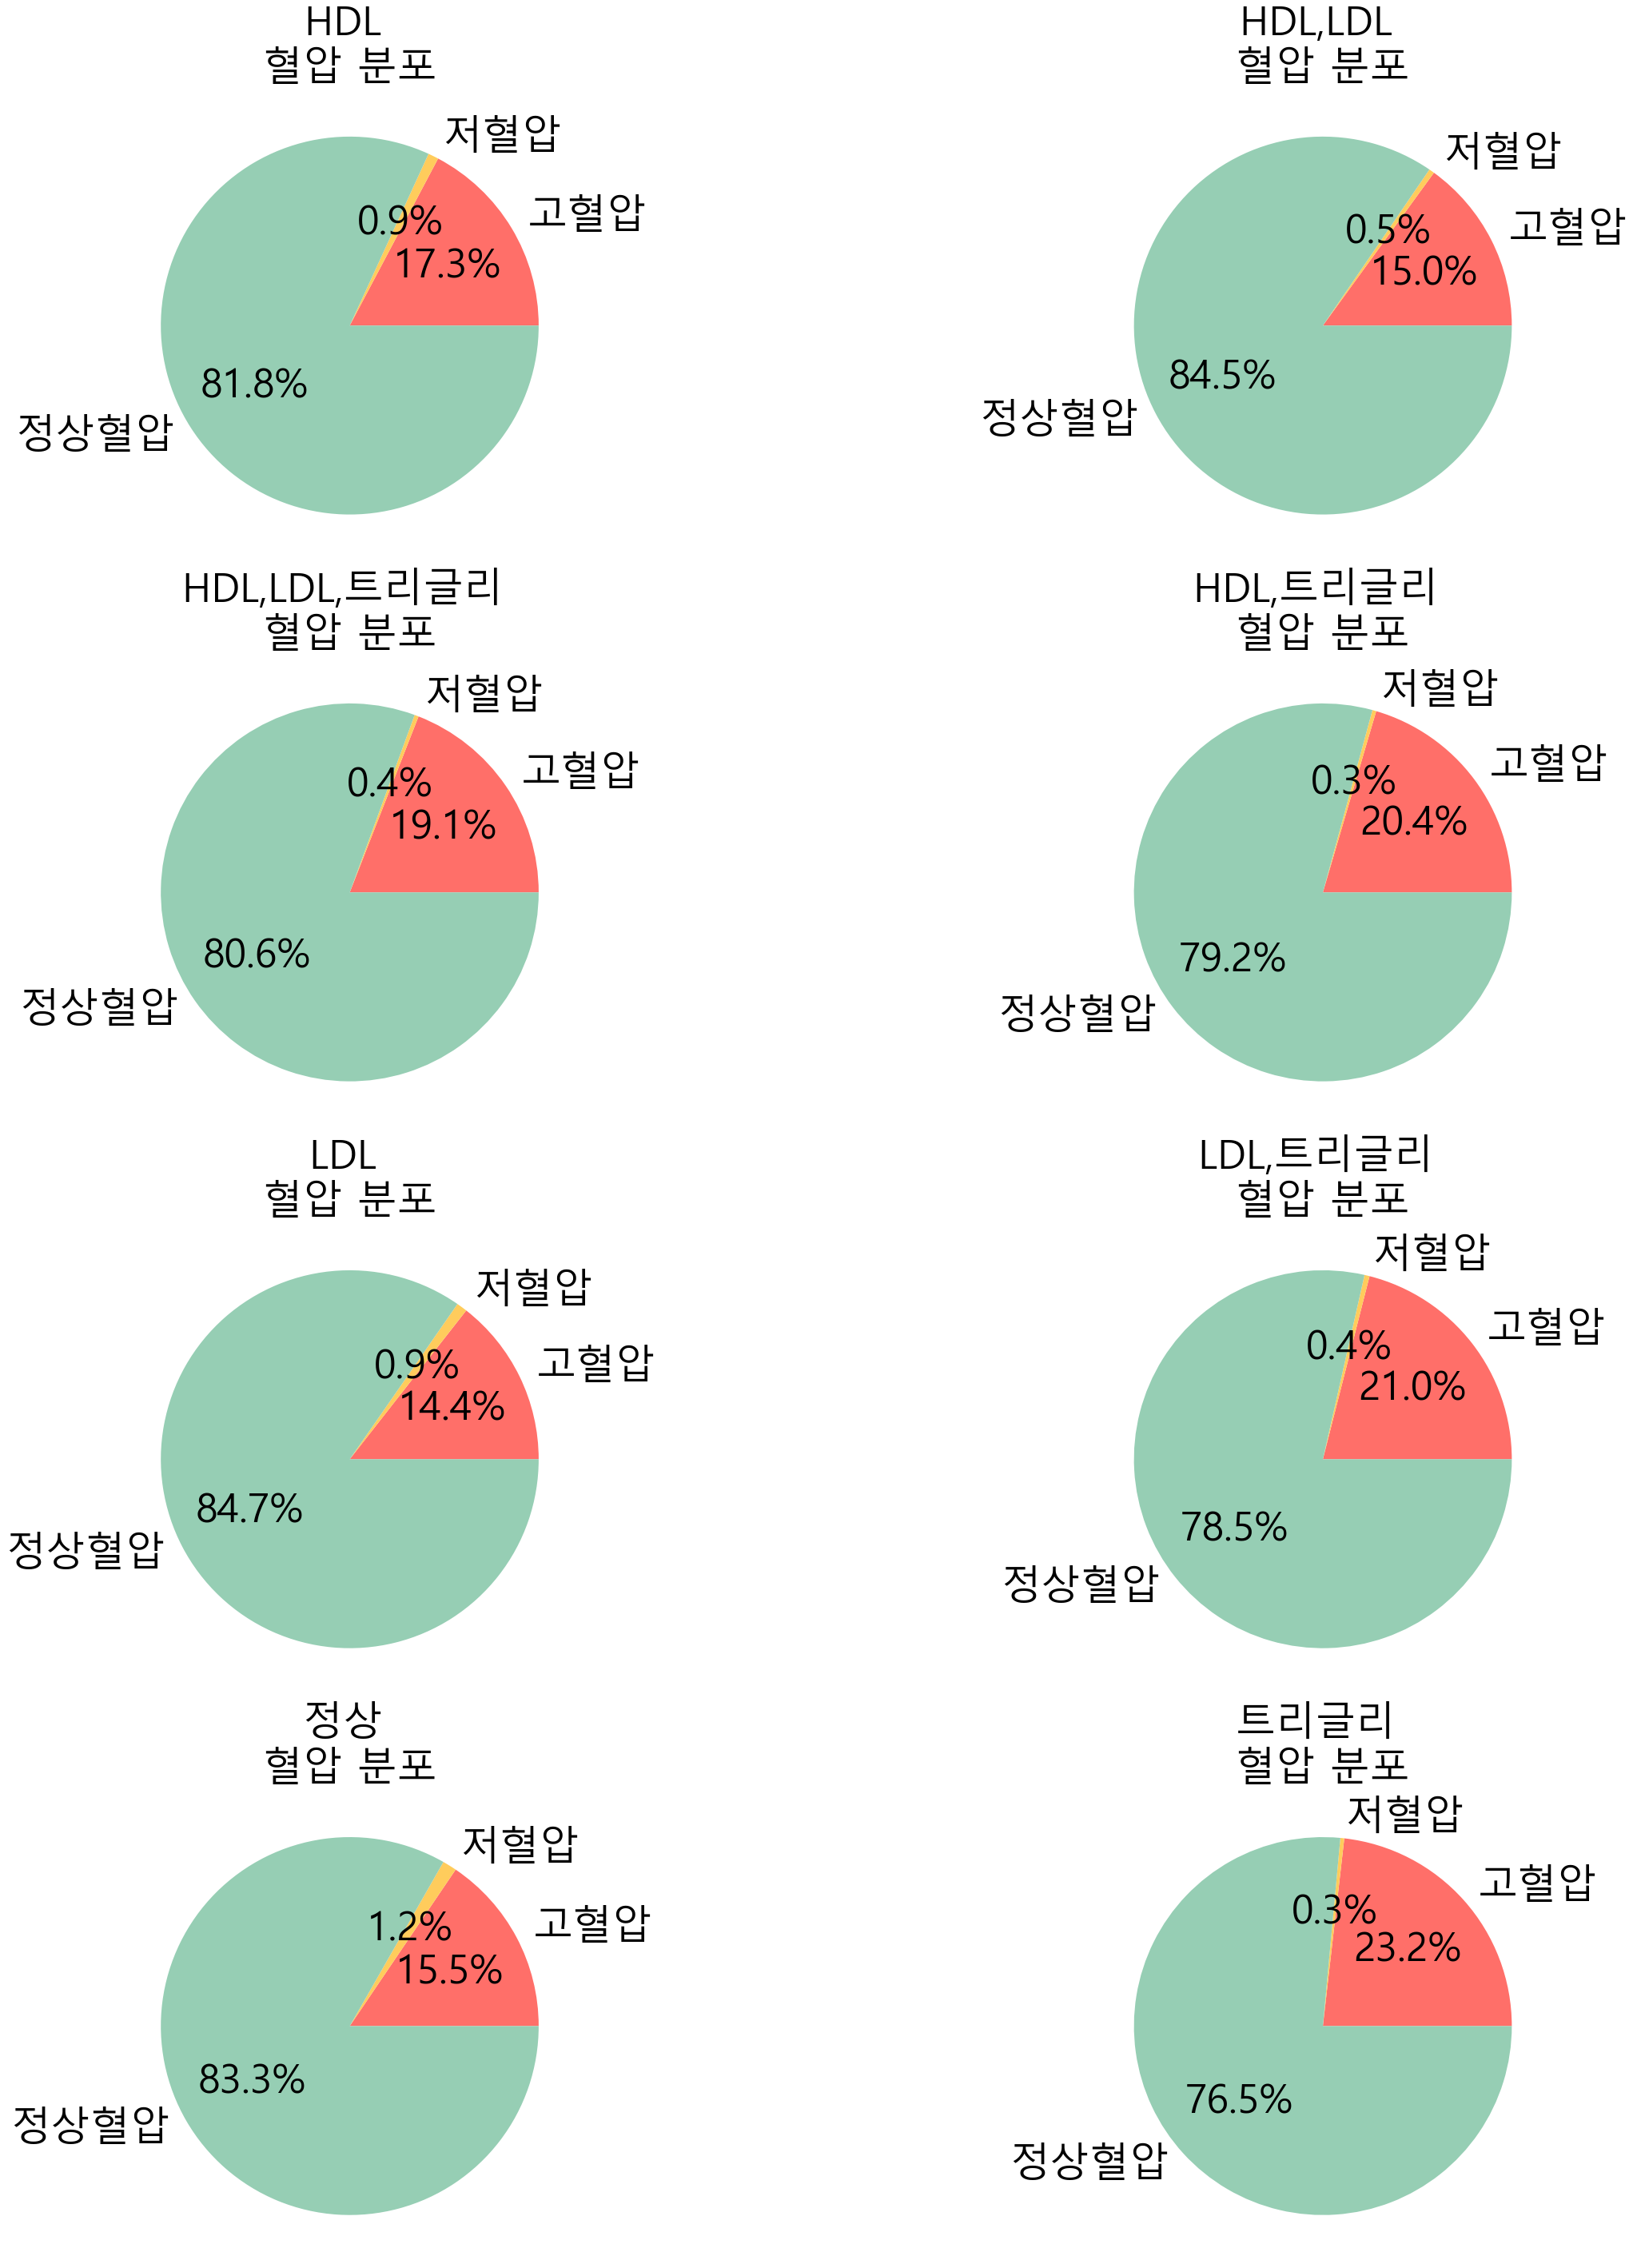

In [123]:
# 심장질환
# 심장질병에 관련 수치들의 이상이 생길 경우를 파이 차트로 표현
# 
plt.figure(figsize=(40,50))
for i in range(0,8):
    plt.subplot(4,2,i+1)
    plt.pie(콜레스테롤별_혈압.loc[i*3:(i*3)+2,'인원 수'],
            labels=콜레스테롤별_혈압.loc[i*3:(i*3)+2,'혈압'],
            autopct='%.1f%%',
            textprops={'fontsize': 50},
            colors=['#ff6f69','#ffcc5c','#96ceb4']
           )
    plt.title(f'{콜레스테롤별_혈압.loc[i*3,"심장질환"]} \n혈압 분포',fontdict={'fontsize': 50})

In [26]:
검진정보.columns

Index(['기준년도', '가입자 일련번호', '시도', '성별', '연령대', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자', '빈혈유무', 'BMI', '비만정도', '혈압',
       '당뇨', '혈청크레아티닌유무', '신장질환', '간질환'],
      dtype='object')

In [109]:
당뇨_간질환=검진정보.groupby(['음주여부','당뇨','간질환'])[['기준년도']].count()
당뇨_간질환.reset_index(inplace=True)
당뇨_간질환

,음주여부,당뇨,간질환,기준년도
0,0.0,정상,비정상,9159
1,0.0,정상,위험군,14741
2,0.0,정상,정상,209705
3,0.0,공복혈당장애,비정상,7919
4,0.0,공복혈당장애,위험군,11392
5,0.0,공복혈당장애,정상,112553
6,0.0,당뇨병,비정상,4714
7,0.0,당뇨병,위험군,5026
8,0.0,당뇨병,정상,33209
9,1.0,정상,비정상,16526


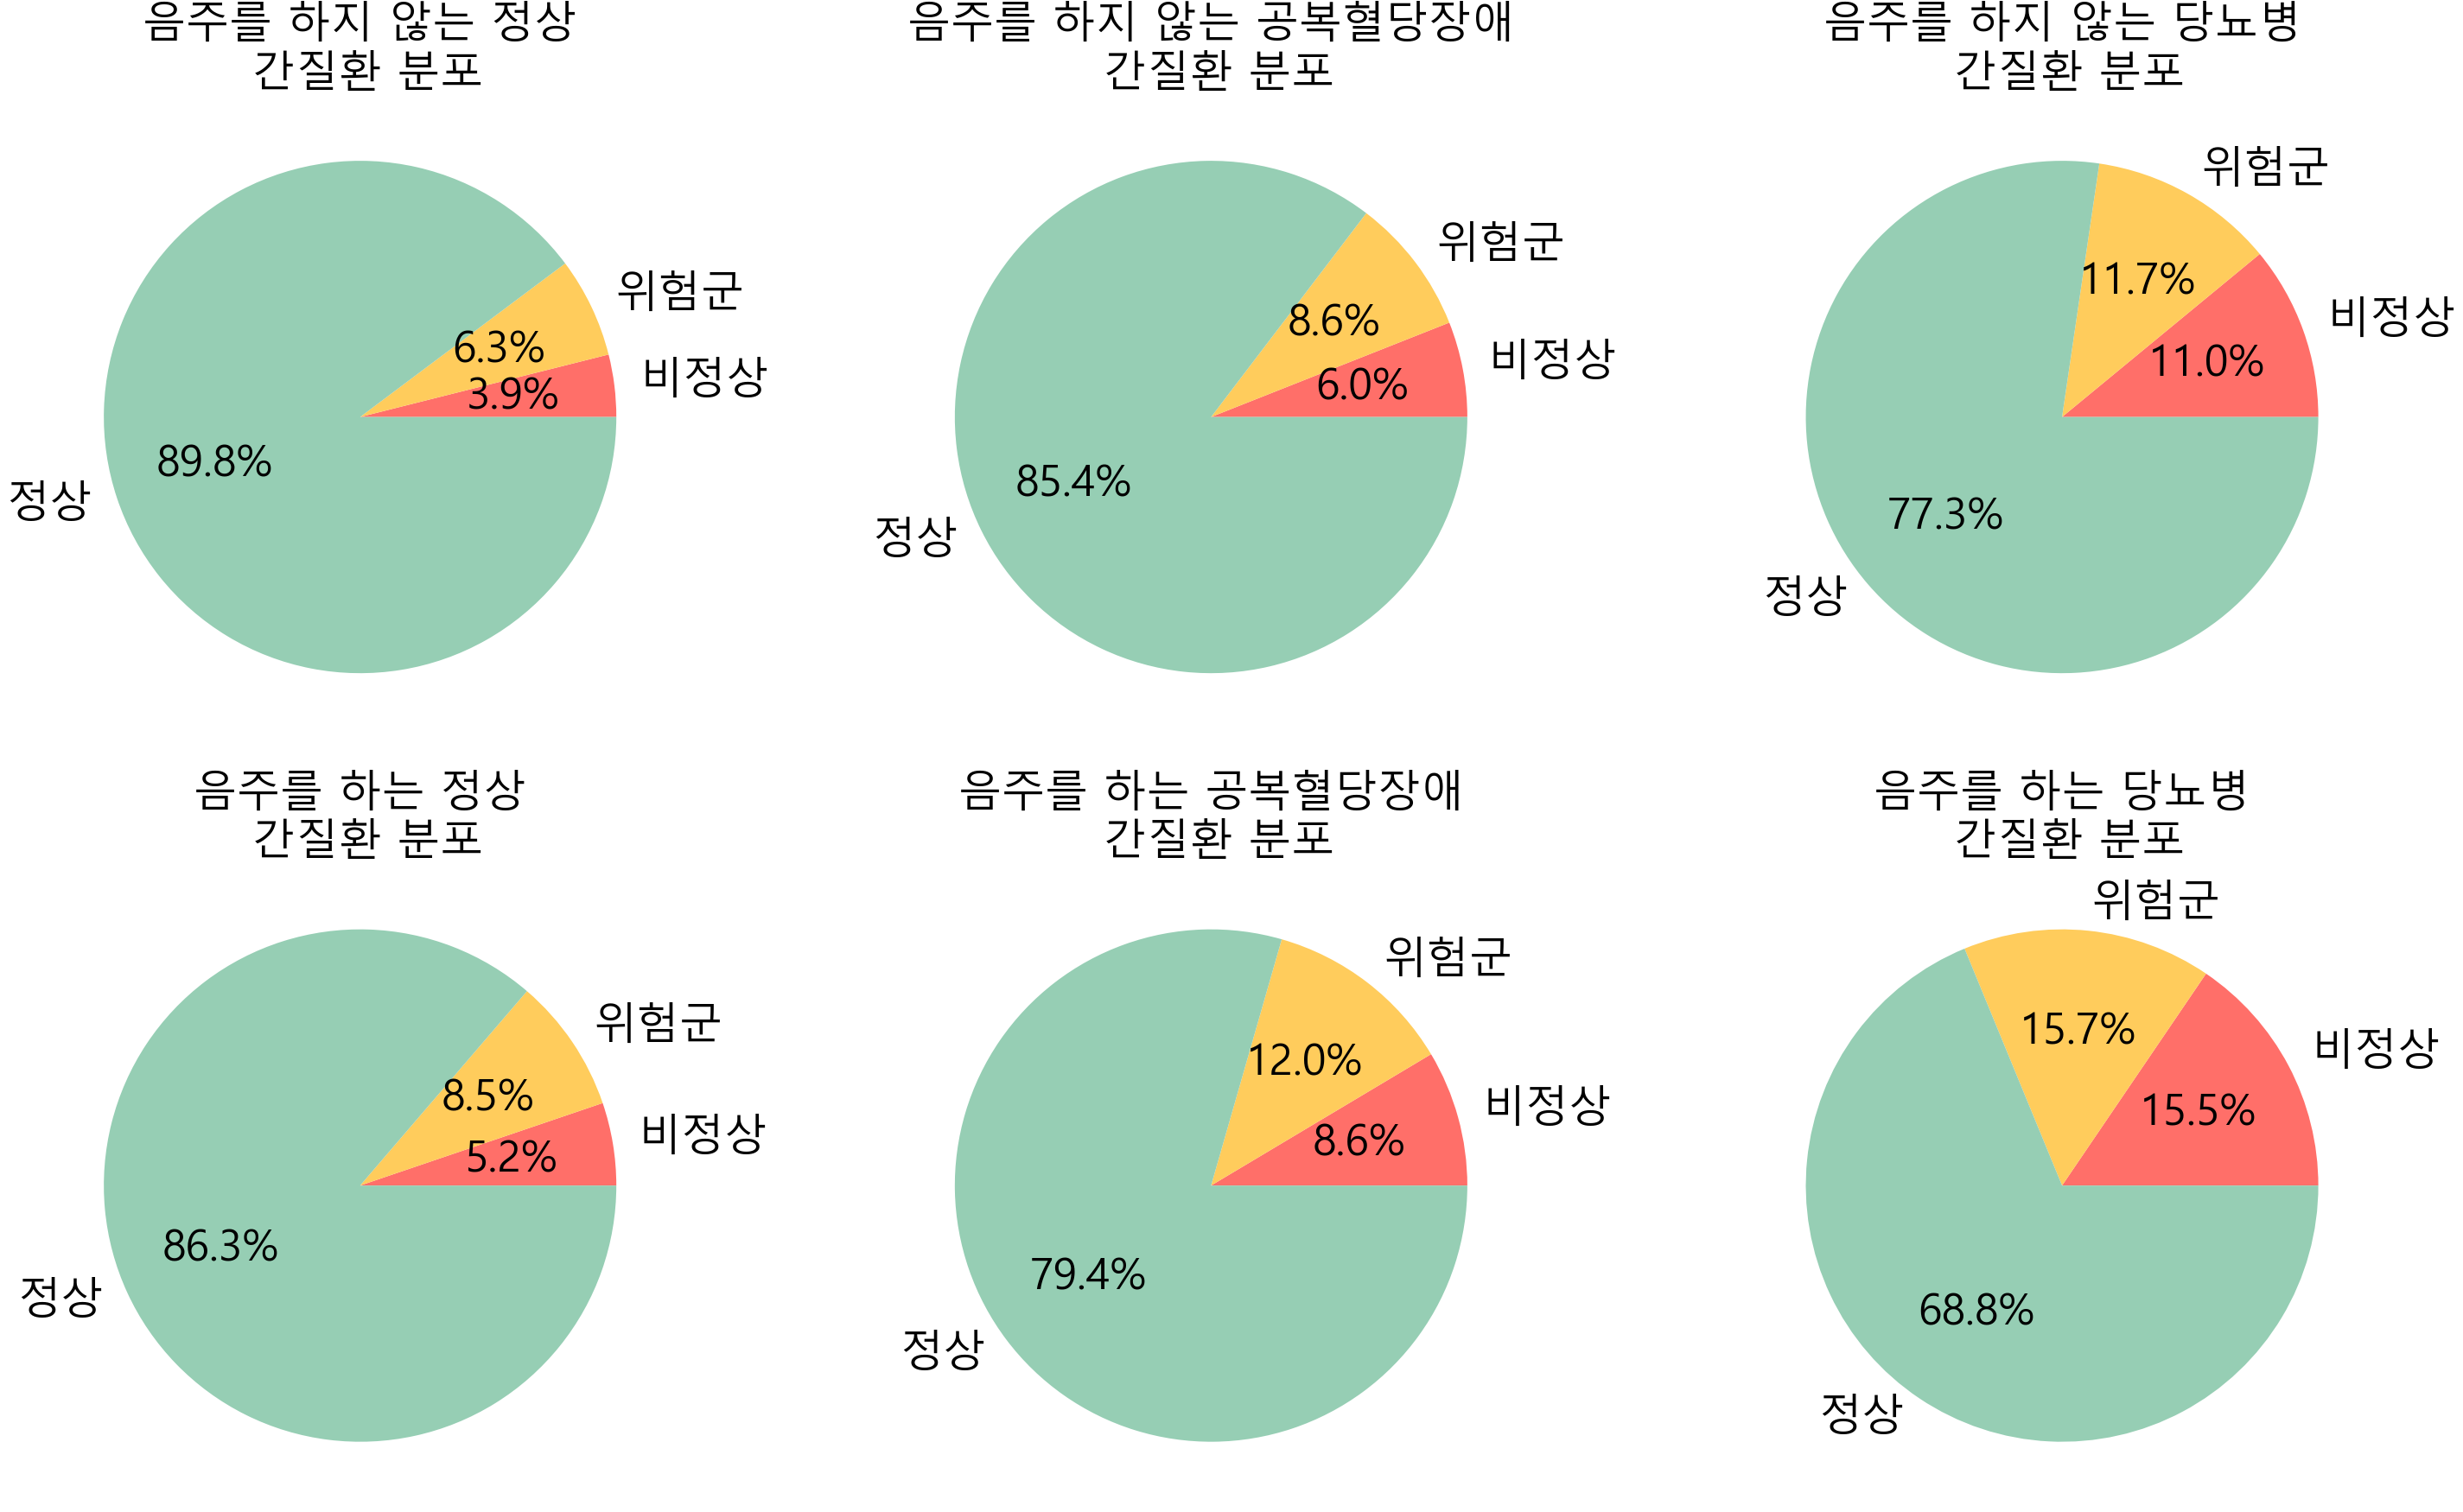

In [119]:
plt.figure(figsize=(50,30))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.pie(당뇨_간질환.loc[i*3:(i*3)+2,'기준년도'],
            labels=당뇨_간질환.loc[i*3:(i*3)+2,'간질환'],
            autopct='%.1f%%',
            textprops={'fontsize': 50}
            ,colors=['#ff6f69','#ffcc5c','#96ceb4'] # 빨, 노, 초
           )
    if i < 3:
        plt.title(f'음주를 하지 않는 {당뇨_간질환.loc[i*3,"당뇨"]}\n 간질환 분포',fontdict={'fontsize': 50})
    else:
        plt.title(f'음주를 하는 {당뇨_간질환.loc[i*3,"당뇨"]}\n 간질환 분포',fontdict={'fontsize': 50})

In [51]:
검진정보[(검진정보['(혈청지오티)AST']>=40) & (검진정보['(혈청지오티)ALT']<30) &(검진정보['비만정도']=='정상')&(검진정보['감마 지티피']<40)][['성별','연령대',
                                                       'BMI','비만정도',
                                                       '(혈청지오티)AST','(혈청지오티)ALT','감마 지티피',
                                                        '혈압','빈혈유무','흡연상태','음주여부']]

,성별,연령대,BMI,비만정도,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,혈압,빈혈유무,흡연상태,음주여부
1140,남,50대,20.761246,정상,48.0,20.0,25.0,정상혈압,정상,2.0,0.0
1386,남,50대,22.038567,정상,45.0,23.0,25.0,정상혈압,정상,2.0,1.0
1669,여,60대,20.811655,정상,41.0,17.0,13.0,정상혈압,정상,1.0,1.0
2052,여,50대,22.222222,정상,47.0,20.0,18.0,정상혈압,정상,1.0,1.0
2490,여,40대,18.730489,정상,52.0,28.0,11.0,정상혈압,정상,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
998687,여,60대,20.811655,정상,62.0,15.0,9.0,정상혈압,비정상,3.0,0.0
998713,여,60대,22.892820,정상,44.0,27.0,19.0,정상혈압,정상,1.0,0.0
998888,여,60대,20.000000,정상,44.0,25.0,12.0,정상혈압,정상,1.0,1.0
999125,여,60대,20.408163,정상,43.0,28.0,36.0,고혈압,비정상,1.0,0.0


In [28]:
비만정도_AST=(검진정보[(검진정보['(혈청지오티)AST']>=40) & (검진정보['(혈청지오티)ALT']<30) &(검진정보['비만정도']=='정상')]).groupby(['(혈청지오티)AST','비만정도'])[['기준년도']].count()
비만정도_AST.reset_index(inplace=True)


In [29]:
sns.(비만정도_AST)

,(혈청지오티)AST,비만정도,기준년도
0,40.0,정상,803
1,41.0,정상,592
2,42.0,정상,485
3,43.0,정상,415
4,44.0,정상,345
...,...,...,...
108,230.0,정상,1
109,232.0,정상,1
110,234.0,정상,1
111,1144.0,정상,1


<Figure size 1080x1080 with 0 Axes>

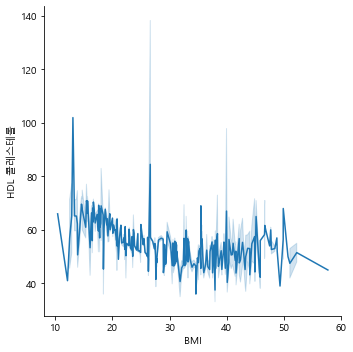

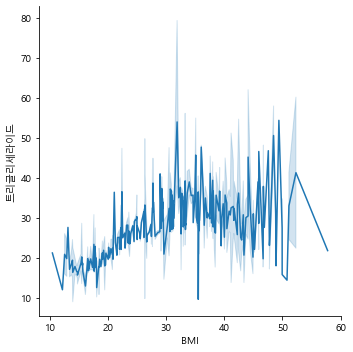

In [130]:
plt.figure(figsize=(15,15))
sns.relplot(data=심장질환, x='BMI', y = 'HDL 콜레스테롤', kind='line')
sns.relplot(data=심장질환, x='BMI', y = 심장질환['트리글리세라이드']/5, kind='line')